In [1]:
!pip install tqdm

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [33]:
class Perceptron:
  
    def __init__ (self):
        self.w = None
        self.b = None
    
    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else 0
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y, epochs = 1, lr = 1):
    
        self.w = np.ones(X.shape[1])
        self.b = 0

        accuracy = {}
        max_accuracy = 0

        wt_matrix = []

        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)
                if y == 1 and y_pred == 0:
                    self.w = self.w + lr * x
                    self.b = self.b - lr * 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x
                    self.b = self.b + lr * 1

            wt_matrix.append(self.w)    
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                j = i
                chkptw = self.w
                chkptb = self.b

        self.w = chkptw
        self.b = chkptb

#         print(max_accuracy,j)
#         print(accuracy.values())
#         plt.plot(list(accuracy.values()))
#         plt.xlabel("Epoch #")
#         plt.ylabel("Accuracy")
#         plt.ylim([0, 1])
#         plt.show()

        return j+1

In [34]:
import ttg
def AND_Dataset(n):
    string = []
    for i in range(n):
        string.append(str(i))
    result = []
    s = ''
    for i in range(len(string)-1):
        s += string[i] + ' and '
    s += string[len(string)-1]
    result.append(s)
    table = ttg.Truths(string, result)
    data = table.as_pandas()
    data.rename(columns={s:'output'}, inplace = True)
    return data;

def OR_Dataset(n):
    string = []
    for i in range(n):
        string.append(str(i))
    result = []
    s = ''
    for i in range(len(string)-1):
        s += string[i] + ' or '
    s += string[len(string)-1]
    result.append(s)
    table = ttg.Truths(string, result)
    data = table.as_pandas()
    data.rename(columns={s:'output'}, inplace = True)
    return data;


df = OR_Dataset(2)
df

,0,1,output
1,1,1,1
2,1,0,1
3,0,1,1
4,0,0,0


In [35]:
from itertools import permutations
l = np.array(list(permutations(range(1, 5))))
hi = []
for i in tqdm(range(l.shape[0]), desc="Loading...", ascii=False, ncols=75):
    hi.append(np.array(df.reindex(l[i])))

Loading...: 100%|████████████████████████| 24/24 [00:00<00:00, 5999.72it/s]


In [36]:
output = []
for i in tqdm(range(len(hi)), desc="Loading...", ascii=False, ncols=75):
    X = np.array(hi[i][:, 0:2], dtype='int32')
    Y = np.array(hi[i][:, 2], dtype='int32')
    perceptron = Perceptron()
    no_of_epochs = perceptron.fit(X, Y, 100, 0.01)
    output.append(no_of_epochs)
    
output

Loading...: 100%|██████████████████████████| 24/24 [00:00<00:00, 74.00it/s]


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

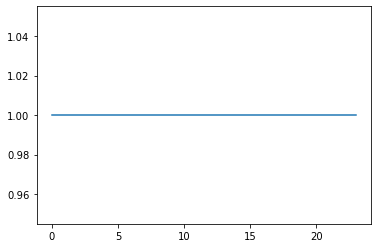

In [37]:
plt.plot(output)